### Setup

In [1]:
import numpy as np 
import subprocess
import os
import matplotlib.pyplot as plt
import galsim
import copy 
import fitsio 

In [2]:
%pylab inline
from astropy.table import Table
import fitsio

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
#directories that would be using 
WLD = '/Users/Ismael/code/lensing/WeakLensingDeblending/'
repo = '/Users/Ismael/code/lensing/repo/'
AEGIS = '/Users/Ismael/aegis/WeakLensingDeblending/'
intermediate_fits = '/Users/Ismael/aegis/WeakLensingDeblending/data/intermediate_fits/'
intermediate_fits_aegis = '/nfs/slac/g/ki/ki19/deuce/AEGIS/ismael/data/intermediate_fits/'
os.chdir(intermediate_fits_aegis)

### Partitioning in RA and DEC

In [ ]:
#do a scatter plot of ra vs dec. 

In [58]:
table

<Table length=858502>
 galtileid         ra              dec         ...      z_ab          y_ab    
   int64        float64          float64       ...    float64       float64   
------------ -------------- ------------------ ... ------------- -------------
  2200871446 0.418319702147 -0.000148399994941 ... 23.0723800659 22.9095973969
  2205921112 0.420028448104  -0.00100259995088 ... 25.8779563904 25.7642536163
  2205010878 0.423432350157  -0.00312969996594 ... 25.6281528473 25.5399188995
  2208734677  0.42108619213 -7.25999998394e-05 ... 25.9380722046 25.6458129883
  2212241881 0.423181056976  -0.00218109996058 ... 26.7419490814 26.1817016602
  2204477290 0.422583341599 -0.000604000000749 ... 24.9572029114 24.4631252289
  2201104165 0.422105312347  -0.00160690001212 ... 23.0481529236  22.813867569
  2211831084 0.422278761862  -0.00242089992389 ... 26.8970832825 26.4211711884
  2213920571 0.428705215453  -0.00933680031449 ... 27.3432483673 27.5143566132
  2209679020 0.426987767219  -0.00824970006943 ... 26.4114837646 26.3559627533
         ...            ...                ... ...           ...           ...
402709423183  359.877529502     0.468313187361 ... 26.2061023712 25.9938392639
402717225447  359.873967052     0.469882488251 ...  28.159286499 28.0919113159
402708240625  359.874082327     0.469963699579 ... 26.1617202759 25.9628505707
402715331570  359.875172257     0.470767110586 ...  26.918012619 26.7960968018
402700244654  359.875229836     0.469946593046 ... 21.5558547974 21.2948169708
402714175618  359.875075817      0.47013181448 ... 26.8473339081 26.6255302429
402709151935   359.87477541      0.47007510066 ... 26.4419765472 26.3202629089
402713323434   359.87379849     0.467285513878 ... 27.1825656891 27.1724567413
402715701509  359.873594165     0.467974096537 ... 27.7269096375 27.7457923889
402713559114   359.87430954     0.468111813068 ...  26.734916687 26.2546386719

In [15]:
table = Table.read('data/fits/OneDegSq.fits')


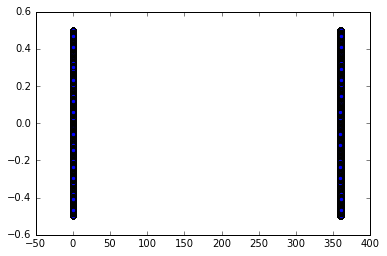

In [17]:
plt.scatter(table['ra'],table['dec'])

(359, 361.0)

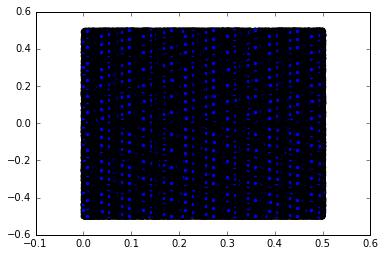

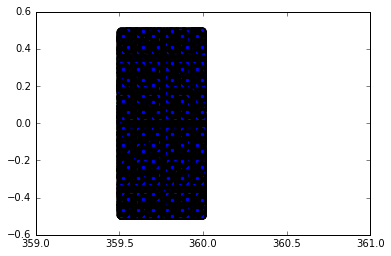

In [20]:
plt.figure()
plt.scatter(table['ra'],table['dec'])
plt.xlim(-.1,.6)
plt.figure()
plt.scatter(table['ra'],table['dec'])
plt.xlim(359,361.)

In [ ]:
#the important thing to notice is the range of ra and dec. 

In [ ]:
#this was done in jobs1.py , jobs2.py - that has the commands to run in slac. 

### which direction ra and dec point? 

In [53]:
o1 = subprocess.check_output('./simulate.py --catalog-name data/fits/OneDegSq.fits --output-name test1 --ra-center 0. --dec-center 0. --image-width 30 --image-height 30',shell=True)
o2 = subprocess.check_output('./display.py -i test1.fits -o test1.png --no-display',shell=True)
print o1,o2

In [54]:
o1 =subprocess.check_output('./simulate.py --catalog-name data/fits/OneDegSq.fits --output-name test2 --ra-center 0. --dec-center 0. --image-width 50 --image-height 50',shell=True)
o2 =subprocess.check_output('./display.py -i test2.fits -o test2.png --no-display',shell=True)
print o1,o2

In [55]:
o1 =subprocess.call('./simulate.py --catalog-name data/fits/OneDegSq.fits --output-name test3 --ra-center 0. --dec-center 0.001 --image-width 30 --image-height 30',shell=True)
o2 =subprocess.call('./display.py -i test3.fits -o test3.png --no-display',shell=True)
print o1,o2

0 0


In [63]:
cmd = "./display.py -i tutorial.fits -o test4.png --magnification 2 --select 'snr_grpf>10' --select 'purity<0.99' --info 'z=%(z).2f, i=%(ab_mag).1f' --info-color black --info-size x-large"
o1 = subprocess.call(cmd,shell=True)
print o1

0


In [77]:
cmd1 = "./simulate.py --catalog-name data/fits/OneDegSq.fits --output-name tutorial2 --ra-center 0.001 --dec-center 0.001 --image-width 300 --image-height 300"
cmd2 = "./display.py -i tutorial2.fits -o test5.png --magnification 2 --select 'snr_grpf>10' --select 'purity<0.99' --info 'z=%(z).2f, i=%(ab_mag).1f' --info-color black --info-size x-large"
o1 =subprocess.call(cmd1,shell=True)
o2 = subprocess.check_output(cmd2,shell=True)
print o1,o2

0 


In [80]:
cmd1 = "./simulate.py --catalog-name data/fits/OneDegSq.fits --output-name tutorial3 --ra-center 0.001 --dec-center 0 --image-width 300 --image-height 300"
cmd2 = "./display.py -i tutorial3.fits -o test6.png --magnification 2 --select 'snr_grpf>10' --select 'purity<0.99' --info 'z=%(z).2f, i=%(ab_mag).1f' --info-color black --info-size x-large"
o1 =subprocess.call(cmd1,shell=True)
o2 = subprocess.check_output(cmd2,shell=True)
print o1,o2

0 


In [81]:
cmd1 = "./simulate.py --catalog-name data/fits/OneDegSq.fits --output-name tutorial4 --ra-center 0 --dec-center 0.001 --image-width 300 --image-height 300"
cmd2 = "./display.py -i tutorial4.fits -o test7.png --magnification 2 --select 'snr_grpf>10' --select 'purity<0.99' --info 'z=%(z).2f, i=%(ab_mag).1f' --info-color black --info-size x-large"
o1 =subprocess.call(cmd1,shell=True)
o2 = subprocess.check_output(cmd2,shell=True)
print o1,o2

0 


In [82]:
import matplotlib.image as img
pic1 = img.imread('test1.png')
pic2= img.imread('test2.png')
pic3= img.imread('test3.png' )
pic4= img.imread('test4.png' )
pic5= img.imread('test5.png' )
pic6 = img.imread('test6.png')
pic7 = img.imread('test7.png')



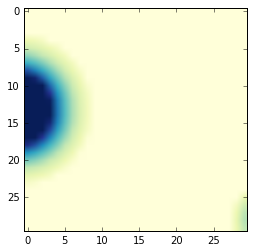

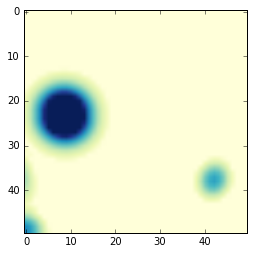

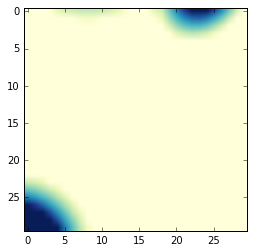

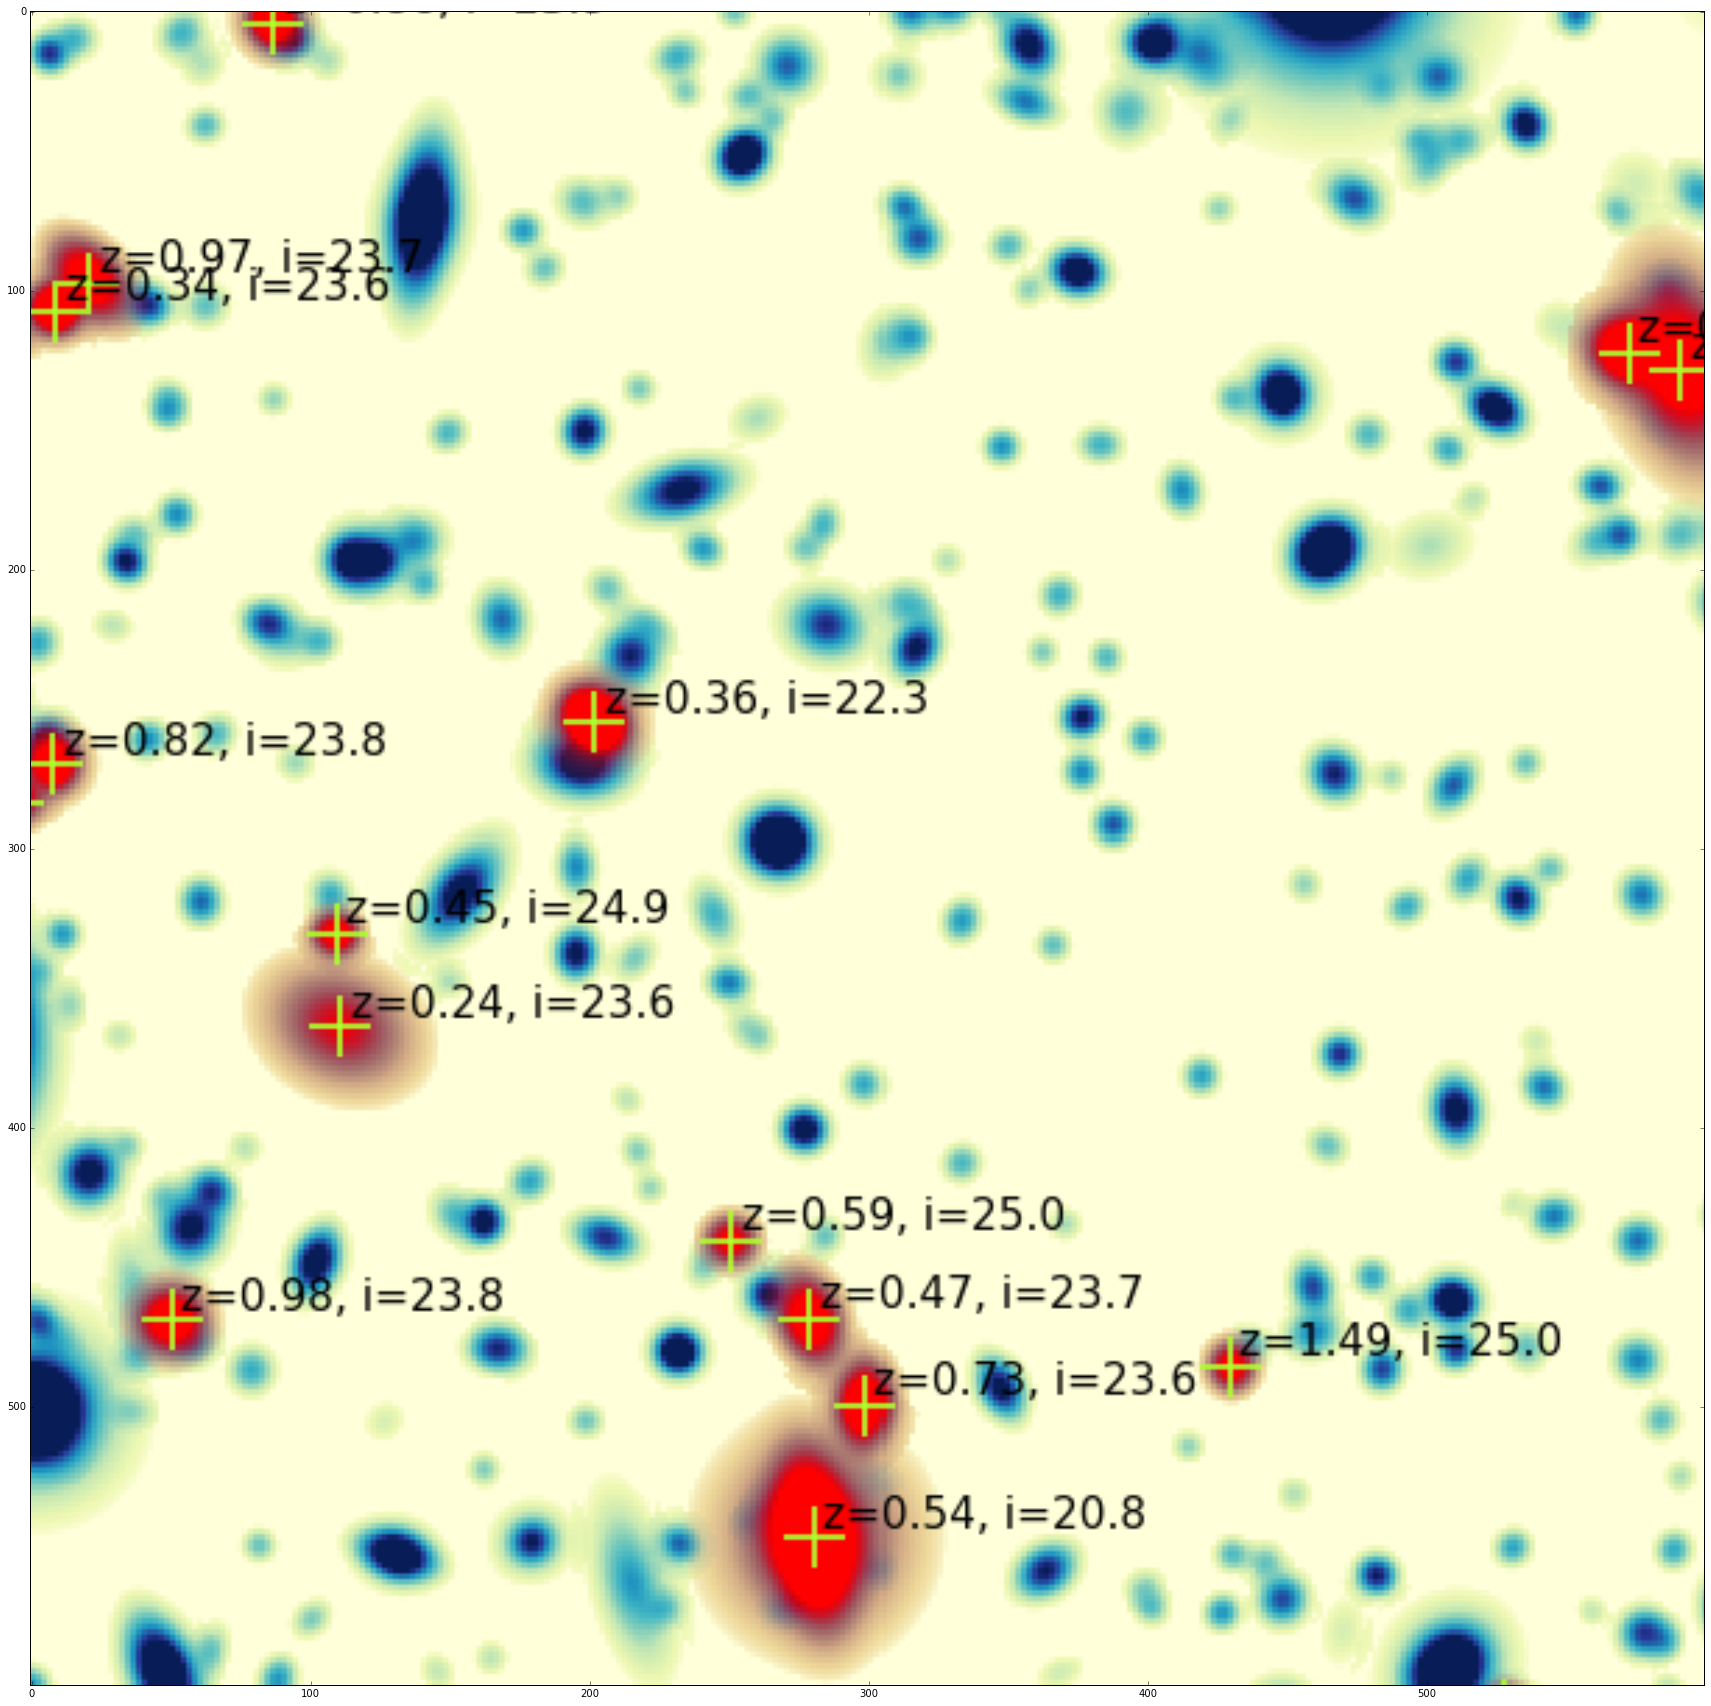

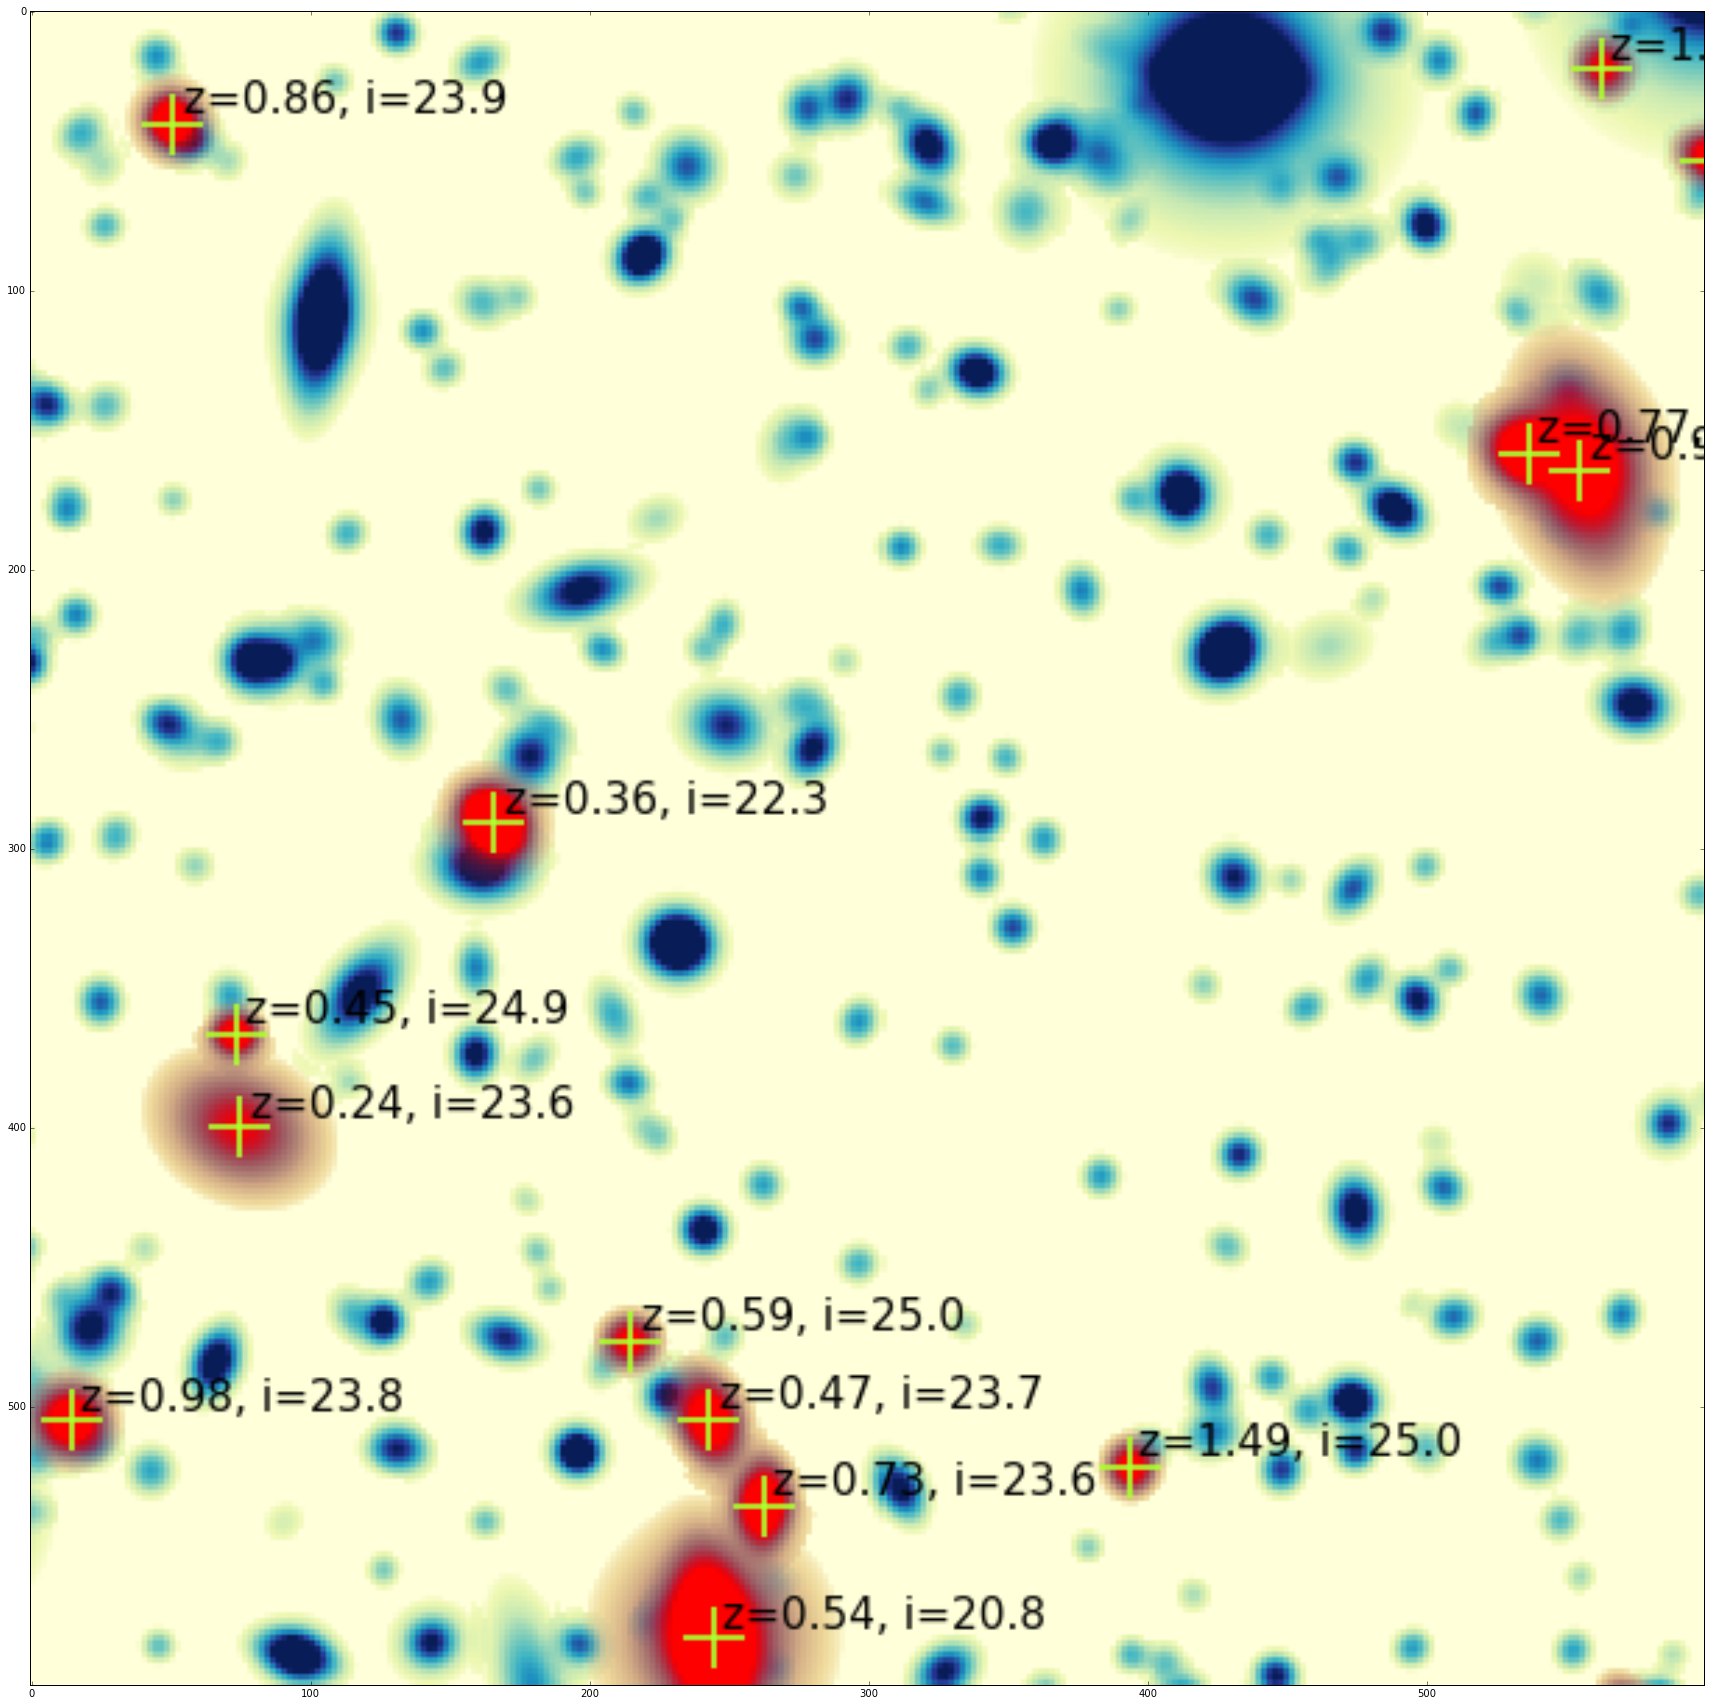

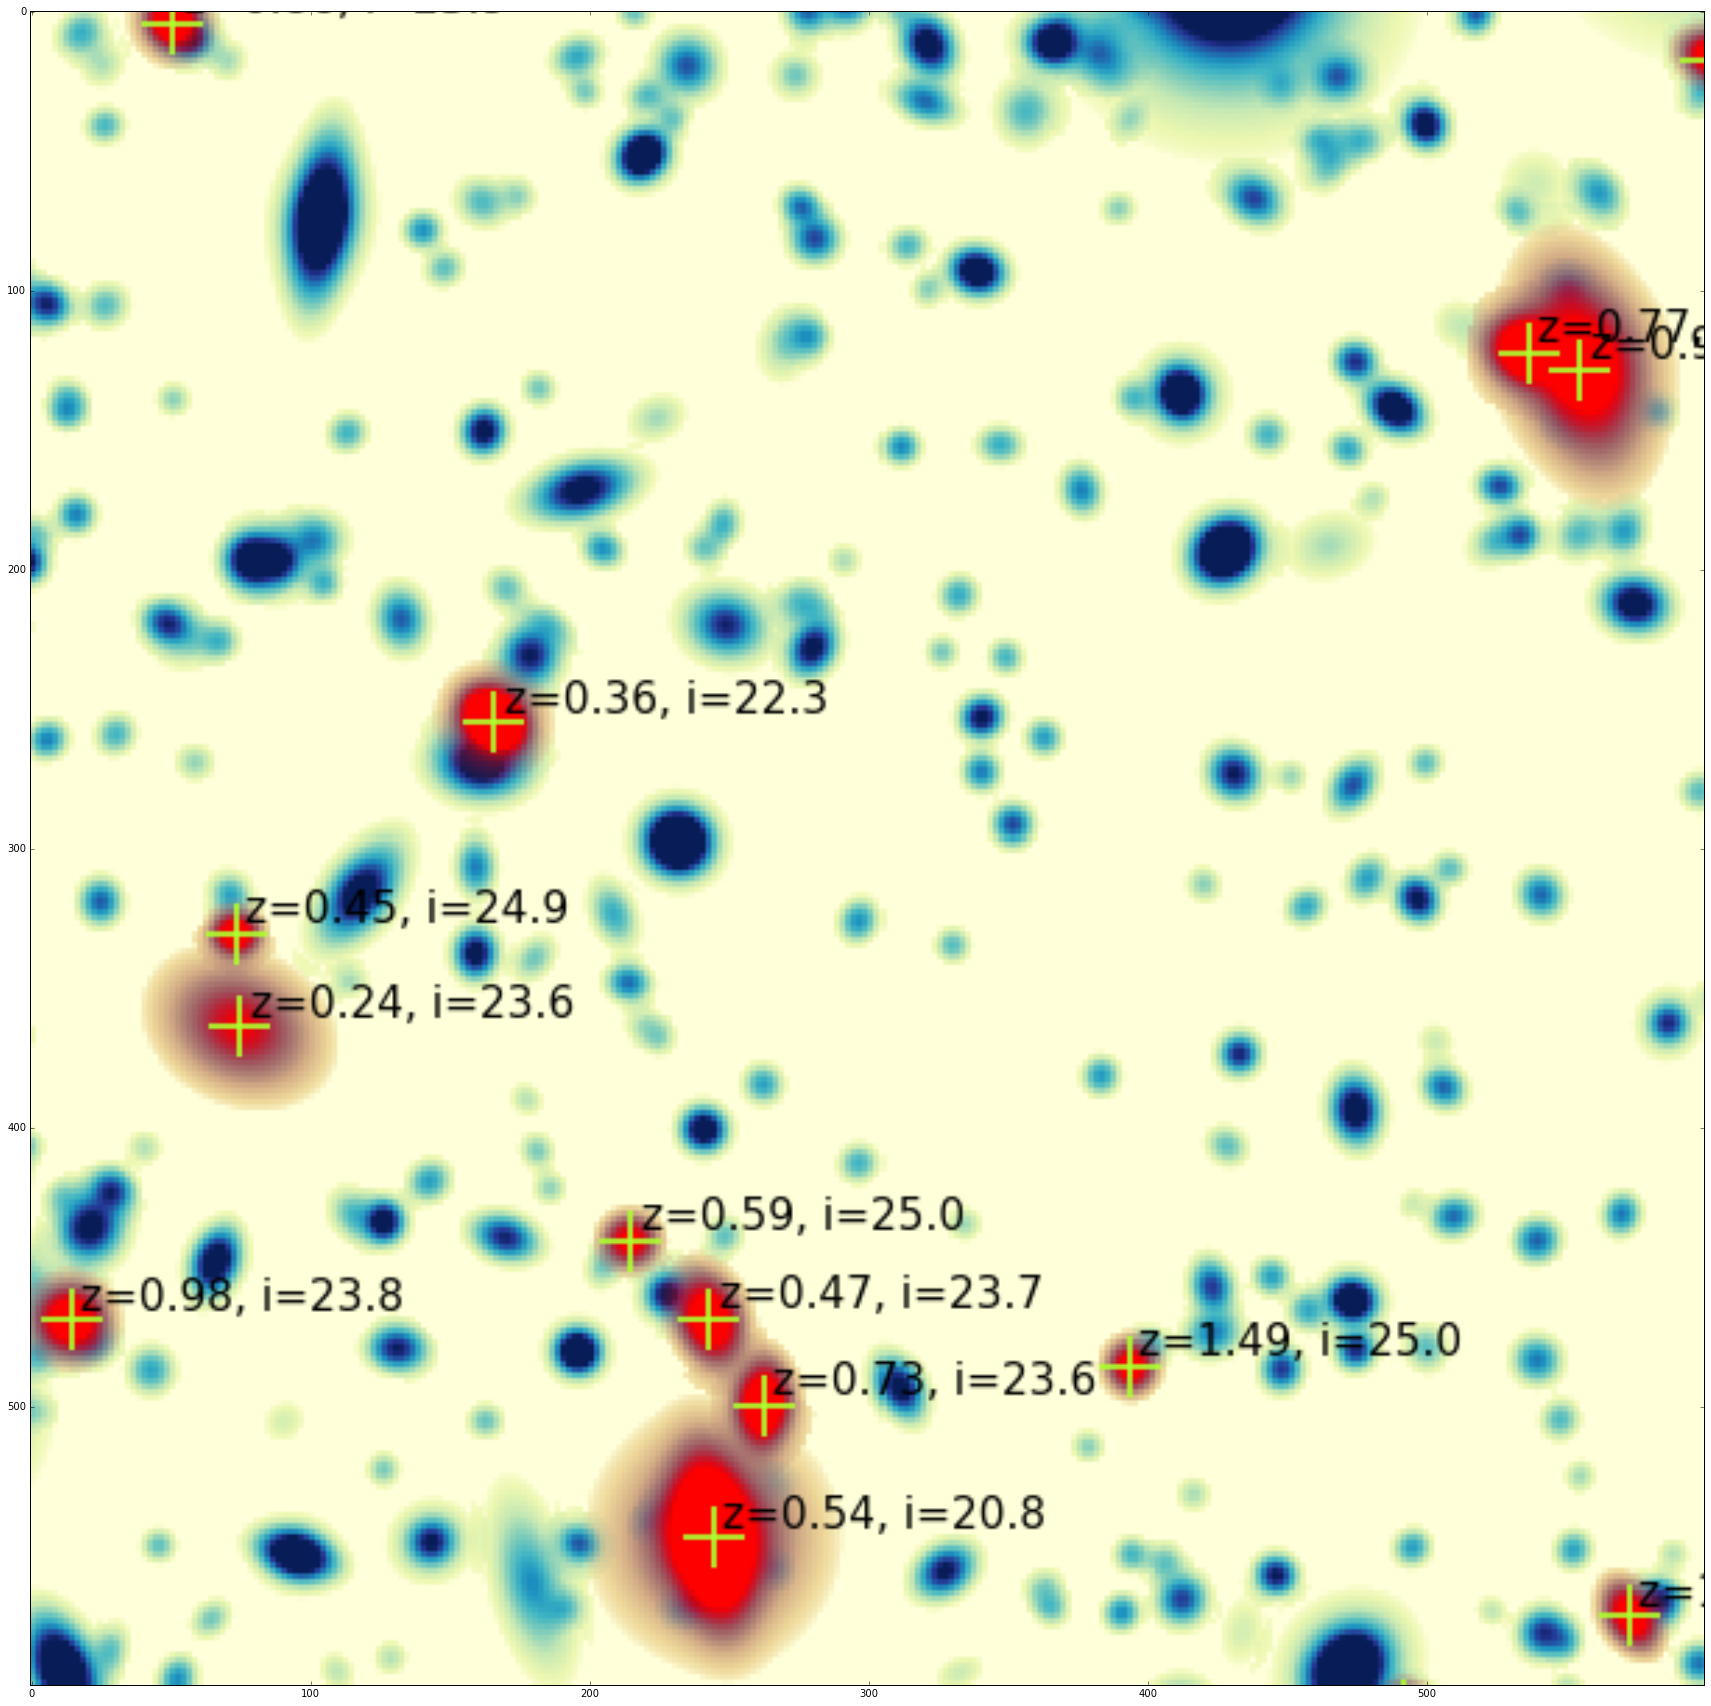

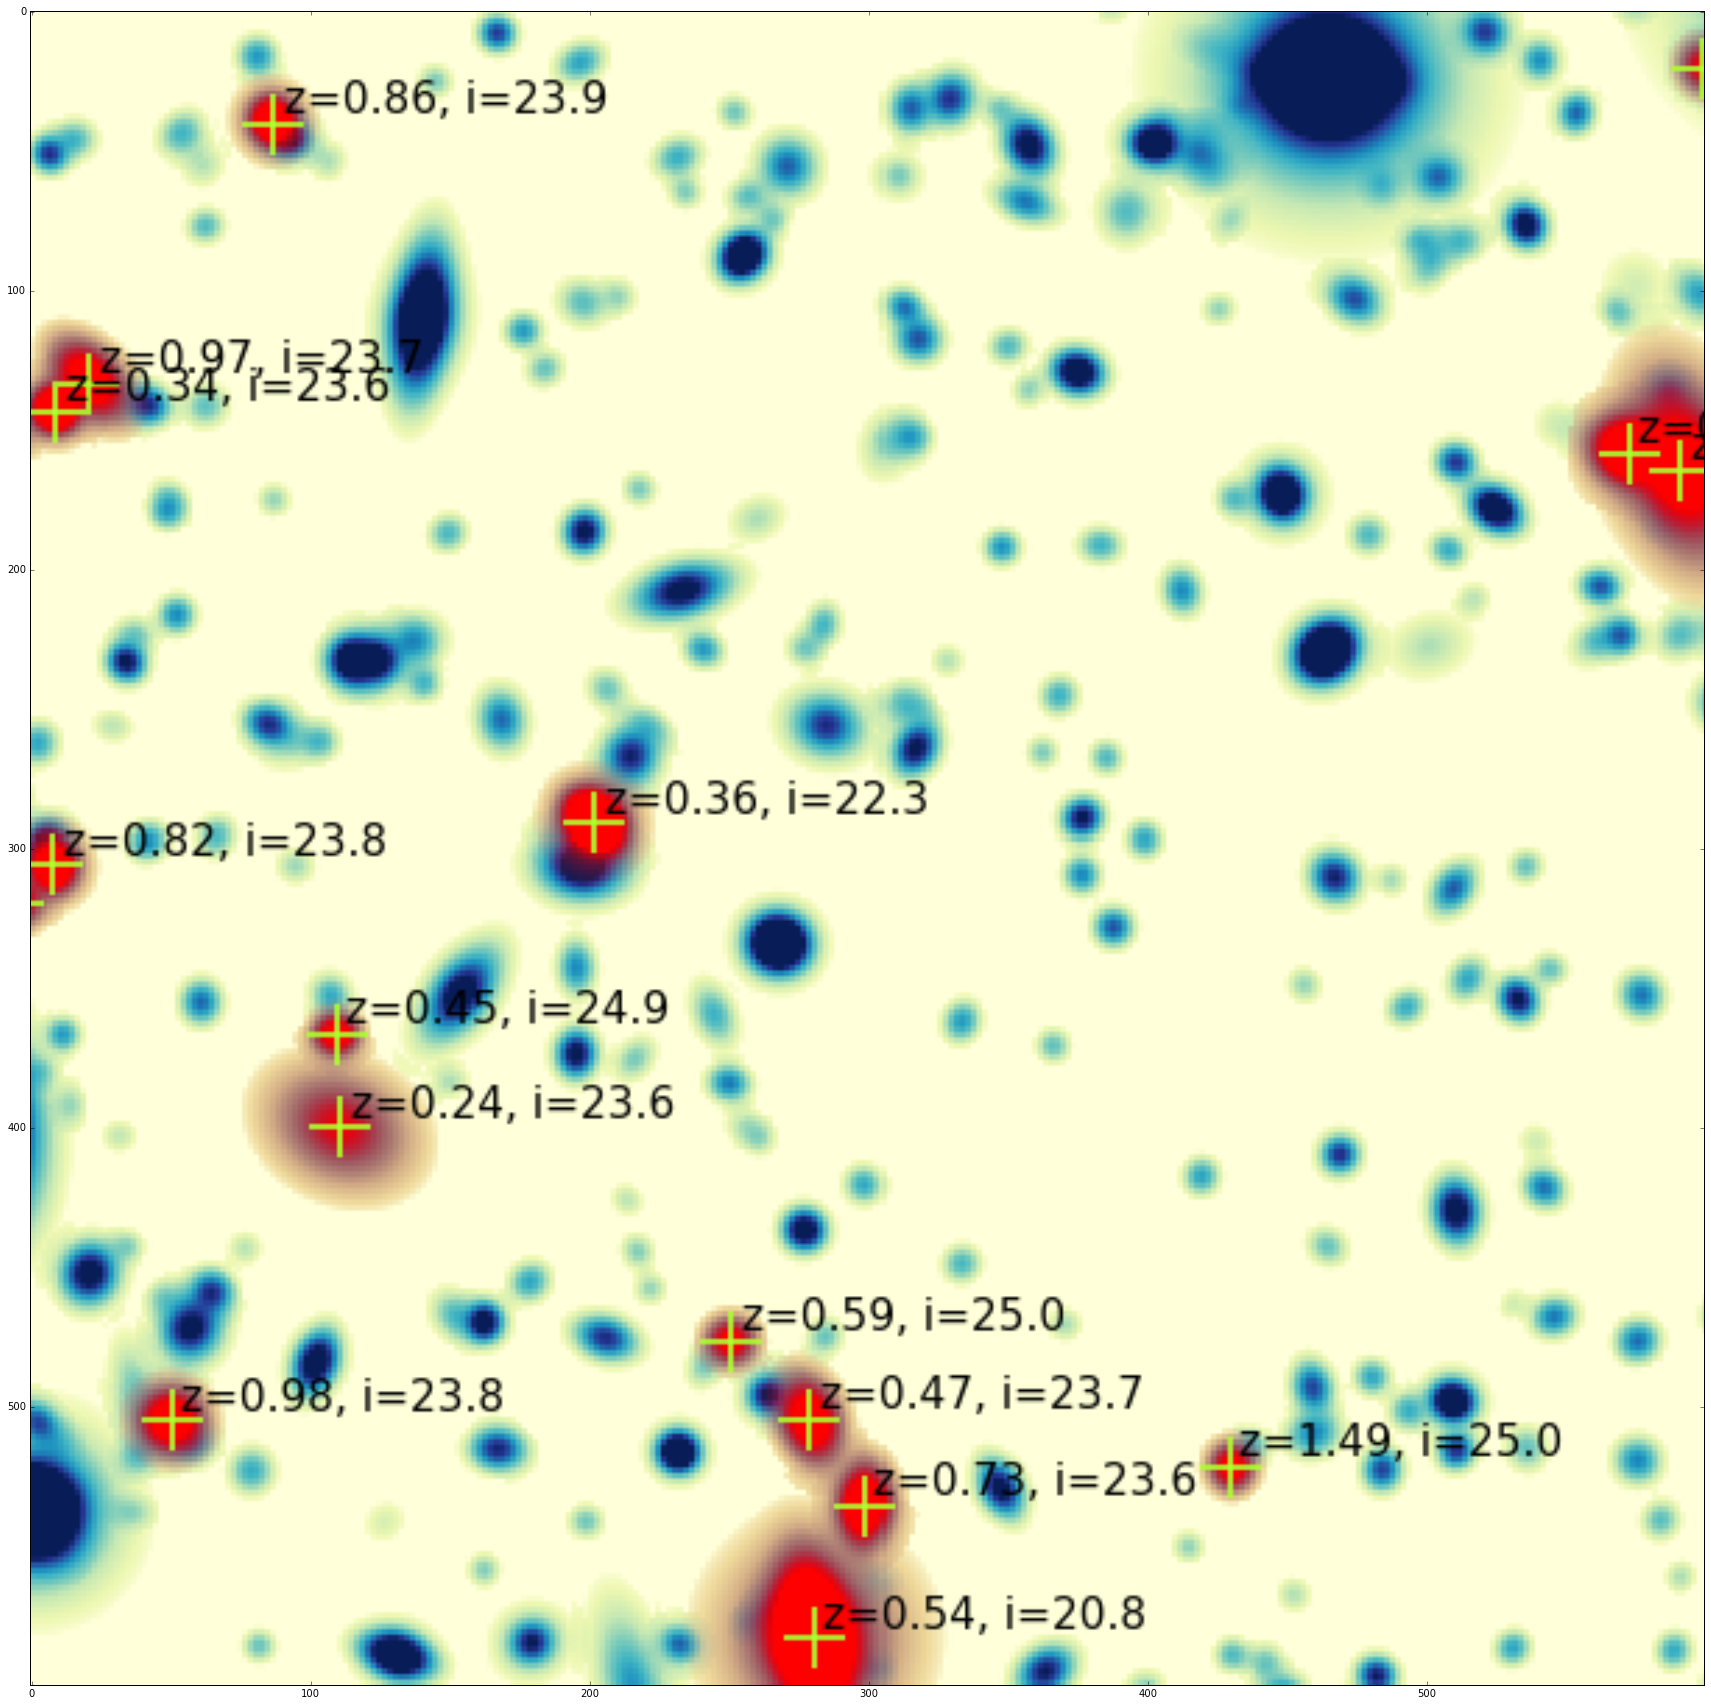

In [83]:
plt.figure()
plt.imshow(pic1)
plt.figure()
plt.imshow(pic2)
plt.figure()
plt.imshow(pic3)
plt.figure(figsize=(20,20))
plt.imshow(pic4)
plt.figure(figsize=(20,20))
plt.imshow(pic5)
plt.figure(figsize=(20,20))
plt.imshow(pic6)
plt.figure(figsize=(20,20))
plt.imshow(pic7)

In [ ]:
# we can look in particular at the object marked with z= .36, i=22.3 
# noitce how in the first picture it is basically in the 200 in the x-axis and greater than 300 in y-axis.
#that same object in the second picture is exactly in the 300 in the y-axis and less than 200 in the x-axis. 
#we increased ra-center from 0 to 0.001 and dec-center from 0 to 0.001 
# the conclusion is that increasing ra-center slides the center of the image in the x positive direction and the dec-center increases it in the y-direction 

### Combining algorithm 

In [4]:
#also have to write a new header to the fits file. 
job_number = 1
pixel_scale = .2
sample_fits_name = 'section00{0}.fits'.format(job_number) #use to get some info. 
noise_seed = 0 #when adding noise to the image. 


#read each. for given job_number. this works for the 1/16 setup. 
#ra: -.5 - .5 left to right, 
#dec: -.5 - .5 down to up, 
endpoint1 = (-.5 + -.25)/2
endpoint2 = -endpoint1
tables = []
#also have to combine the full galaxy postage stamp. 
stamps,past_i = None,None
for i,x in enumerate(np.linspace(endpoint1,endpoint2, 4)):
    for j,y in enumerate(np.linspace(endpoint1,endpoint2, 4)):
        file_name = 'section{0}{1}{2}.fits'.format(i,j,job_number)
        table = Table.read(file_name)
        fits_section = fitsio.FITS(file_name)
        stamp = fits_section[0].read()
        #adjust corresponding entries to the absolute image center 
        table['dx']+=x*18000*pixel_scale #use lsst pixel scale 
        table['dy']+=y*18000*pixel_scale
        tables.append(table)
        if stamps is None: 
            stamps = []
            stamps.append(stamp) 
        else: 
            if past_i == i: 
                stamps[i] = np.vstack([stamp,stamps[i]])
            else: 
                past_i = i 
                stamps.append(stamp)
#combine stamps list into final stamp 
for stamp in stamps: 
    print stamp.shape
full_stamp = np.hstack(stamps)


#take any noise_seed and add noise to the image generated
reader = descwl.output.Reader(sample_fits_name)
results = reader.results
generator = galsim.random.BaseDeviate(seed = noise_seed)
noise = galsim.PoissonNoise(rng = generator, sky_level = results.survey.mean_sky_level)
full_stamp_galsim = galsim.Image(array=full_stamp,wcs=galsim.PixelScale(.2),bounds=galsim.BoundsI(xmin=0, xmax=17999, ymin=0, ymax=17999))
full_stamp_galsim.addNoise(noise)




#save full stamp 
new_fits_name_image = 'SimOSD{0}_image.fits'.format(job_number)
f = fits.PrimaryHDU(full_stamp_galsim.array)
f.writeto(new_fits_name_image)


# fits = fitsio.FITS('section00{0}.fits')
# fits[0].read() = full_stamp #replace postage stamp 

# #all galaxies, simulated survey image 
# print fits[0]
# img = fits[0][:,:] #notice to get 512x512 image we do this
# img = fits[0].read() #can also do this. 

# from astropy.io import fits


from astropy.table import vstack 
Table = vstack(tables)

new_fits_name_table = 'SimOSD{0}_table.fits'.format(job_number)
Table.write(new_fits_name_table)

import astropy.io.fits as fits
#have to adjust to a correct header. 
f = fits.open(new_fits_name_table)
f_sample = fits.open(sample_fits_name)  #sample section of the job_number. 
f[0].header = f_sample[0].header
f[0].header['E_HEIGHT'] = 18000
f[0].header['GE_WIDTH'] = 18000
f[0].header['NAXIS1'] = 18000
f[0].header['NAXIS2'] = 18000
subprocess.call('rm {0}'.format(new_fits_name_table), shell=True) #delete older one so no problems at overwriting. 
f.writeto(new_fits_name_table)

KeyboardInterrupt: 

### Extra stuff. 

In [32]:
f[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NSLICES =                   21                                                  
PSF_SIGM=   0.6166557071664878                                                  
PSF_SIGP=   0.6166557071664878                                                  
PSF_HSM =   0.3458685398101807                                                  
URE_TIME=               6900.0                                                  
IGHTNESS=                 20.0                                                  
DIAMETER=    8.359999999999999                                                  
AIRMASS =                  1.2                                                  
RO_POINT=                 41

(array([ 86347.,  85497.,  86319.,  86483.,  86829.,  86784.,  85755.,
         86464.,  85174.,  85409.]),
 array([ -1.79999280e+03,  -1.43999374e+03,  -1.07999468e+03,
         -7.19995618e+02,  -3.59996558e+02,   2.50244141e-03,
          3.60001562e+02,   7.20000623e+02,   1.07999968e+03,
          1.43999874e+03,   1.79999780e+03]),
 <a list of 10 Patch objects>)

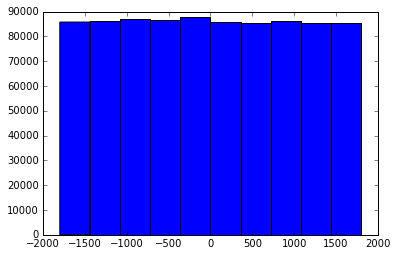

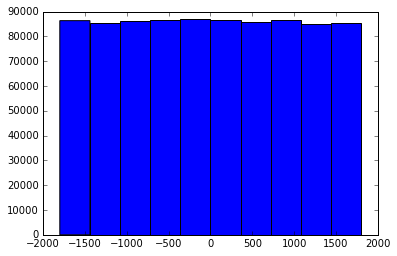

In [36]:
#plot proving we did that distance thing correctly: 
plt.figure()
plt.hist(Table['dx'])
plt.figure()
plt.hist(Table['dy'])

In [ ]:
#1800/.2 = 9000 (18000 = 9000*2 )